In [14]:
import pandas as pd

# Load the dataset
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [15]:
# Check for missing values
missing_values = df.isnull().sum()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# Summary statistics for numerical columns
summary_stats = df.describe()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

missing_values, summary_stats, duplicate_rows

(Transaction ID      0
 Date                0
 Customer ID         0
 Gender              0
 Age                 0
 Product Category    0
 Quantity            0
 Price per Unit      0
 Total Amount        0
 dtype: int64,
        Transaction ID                           Date         Age     Quantity  \
 count     1000.000000                           1000  1000.00000  1000.000000   
 mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
 min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
 25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
 50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
 75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
 max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
 std        288.819436                            NaN    13.68143     1.132734   
 
        Price per Unit  Total Amount  

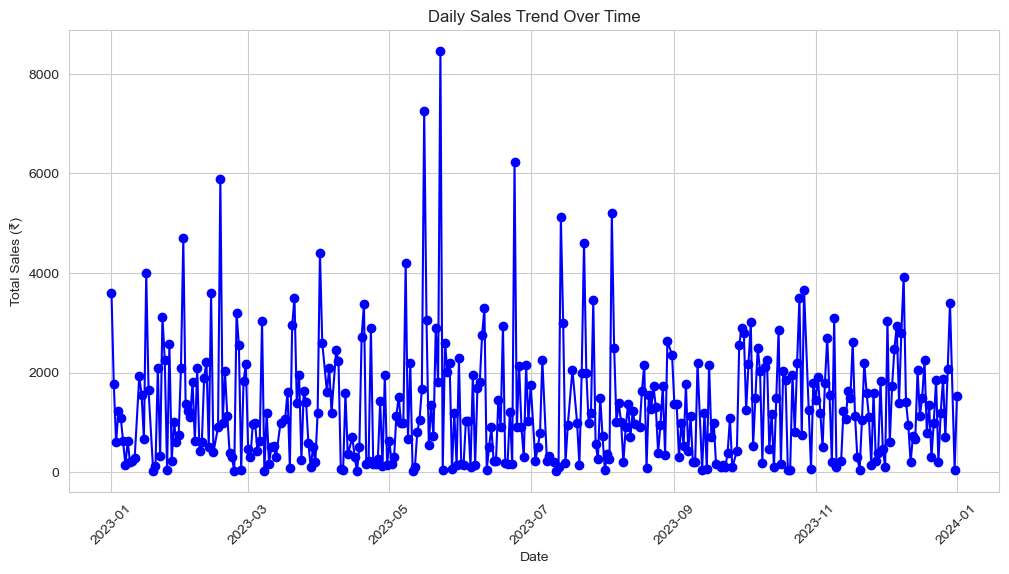

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Aggregate sales by date
sales_trend = df.groupby("Date")["Total Amount"].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales (₹)")
plt.title("Daily Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

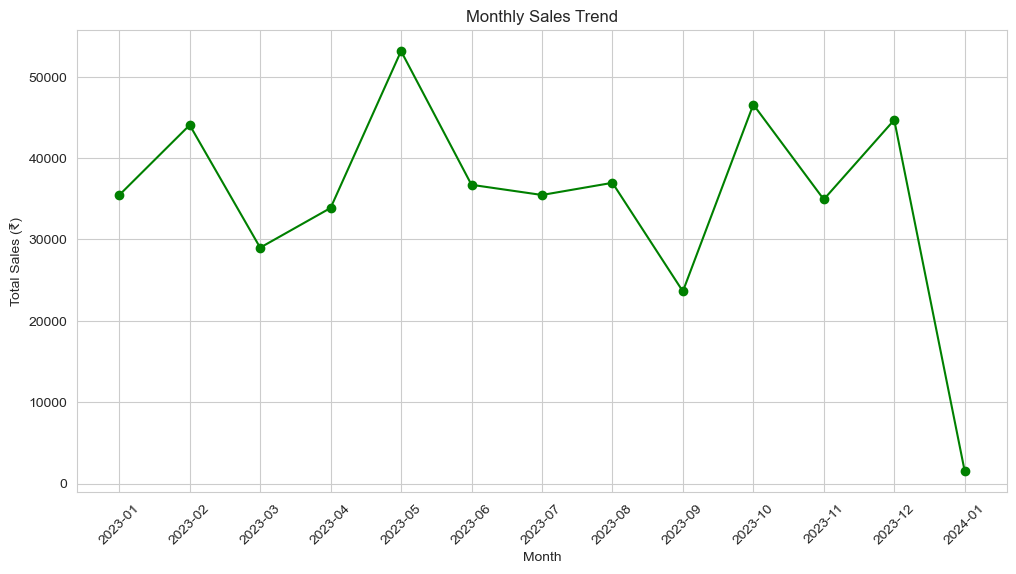

In [12]:
# Extract year-month for aggregation
df["Year-Month"] = df["Date"].dt.to_period("M")

# Aggregate sales by month
monthly_sales = df.groupby("Year-Month")["Total Amount"].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker="o", linestyle="-", color="g")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

C:\Users\meman\AppData\Local\Temp\ipykernel_16196\21357691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, hue=None, palette="viridis", legend=False)


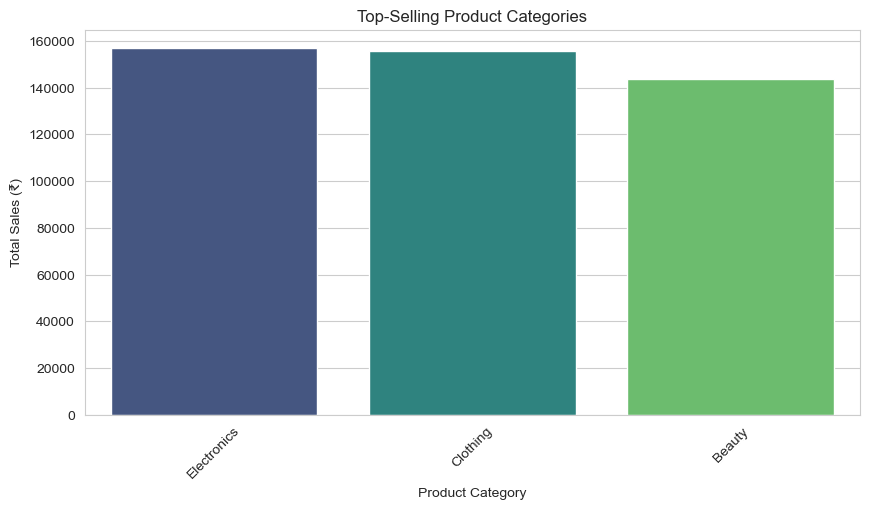

In [17]:
# Aggregate total sales by product category
product_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

# Plot top-selling product categories
plt.figure(figsize=(10, 5))
# sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
sns.barplot(x=product_sales.index, y=product_sales.values, hue=None, palette="viridis", legend=False)
plt.xlabel("Product Category")
plt.ylabel("Total Sales (₹)")
plt.title("Top-Selling Product Categories")
plt.xticks(rotation=45)
plt.show()